In [ ]:
!pip install fdasrsf==2.2.1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import fdasrsf
import pandas as pd
from scipy import interpolate

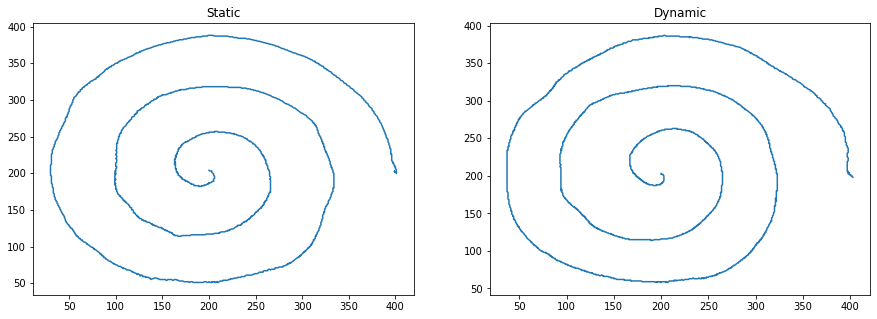

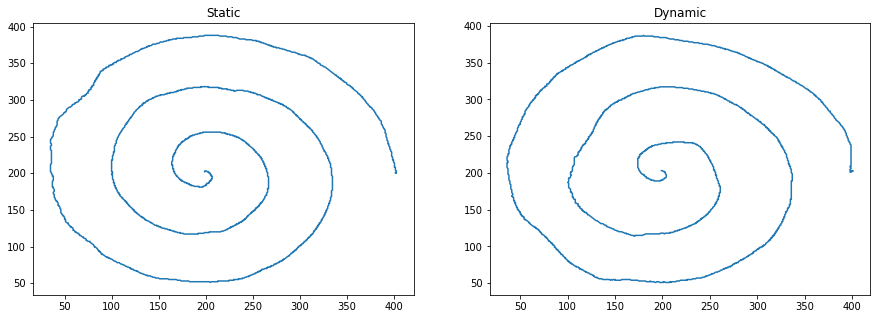

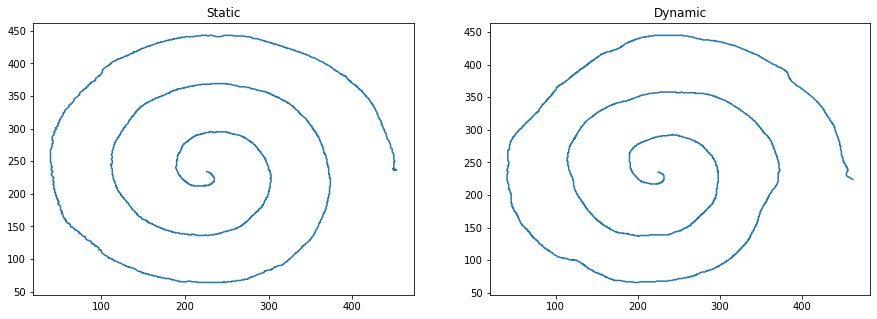

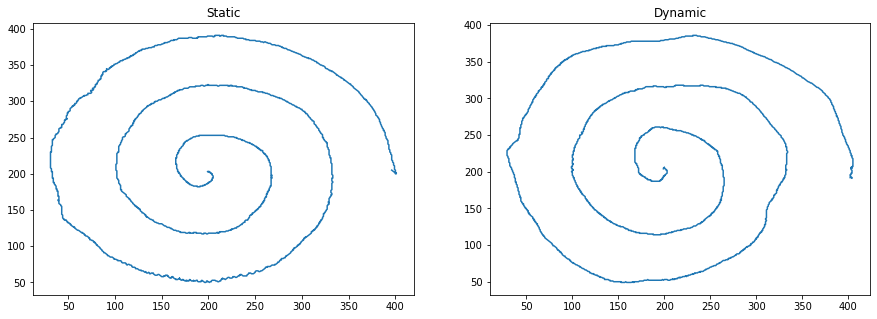

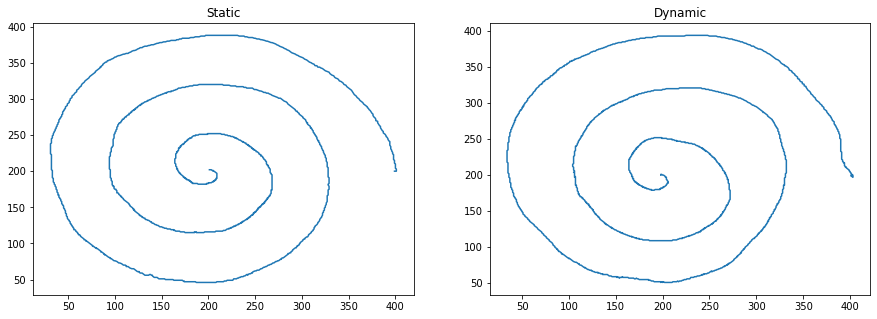

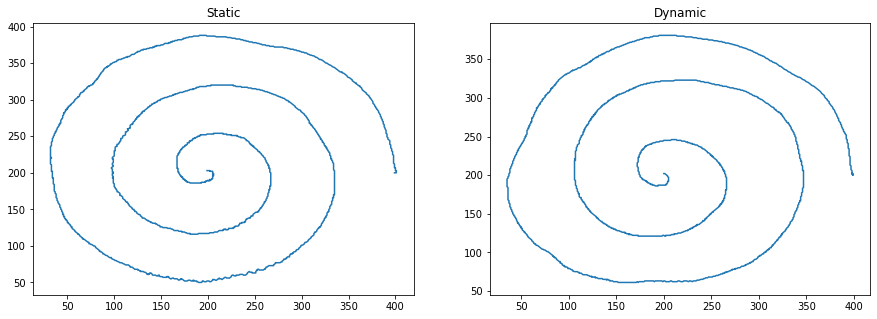

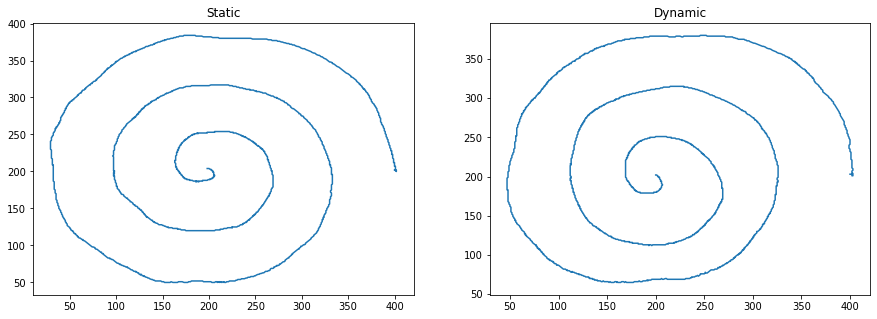

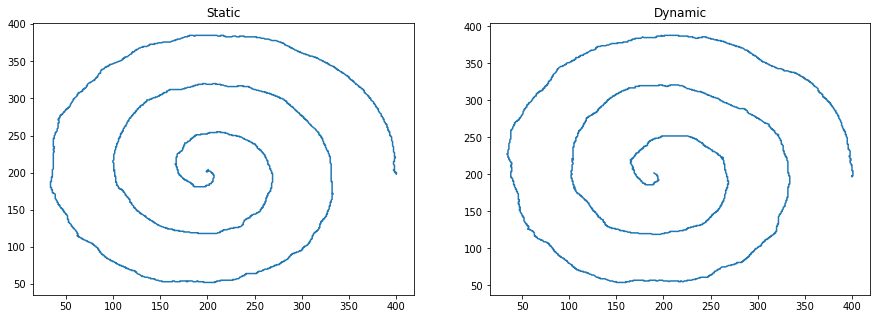

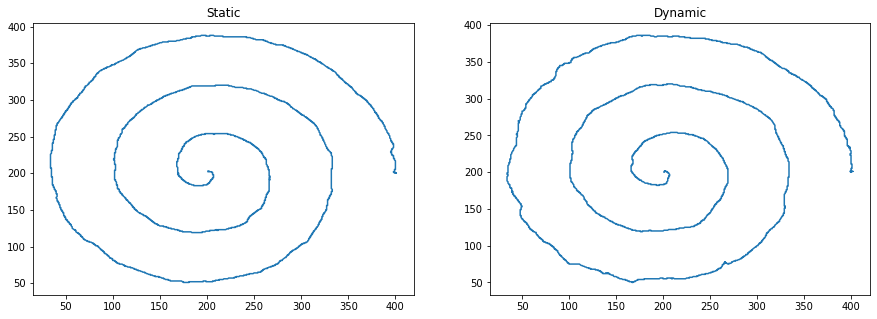

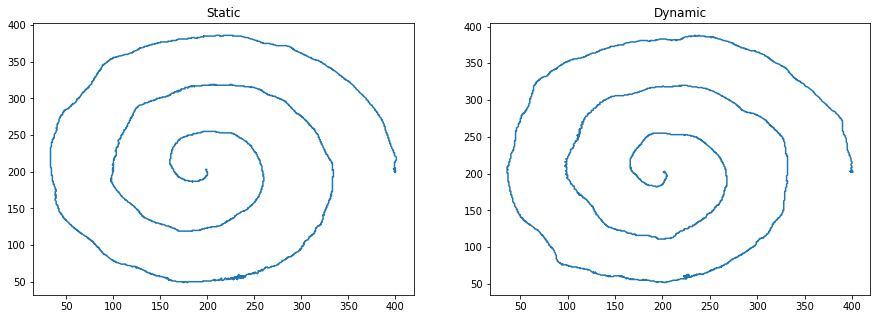

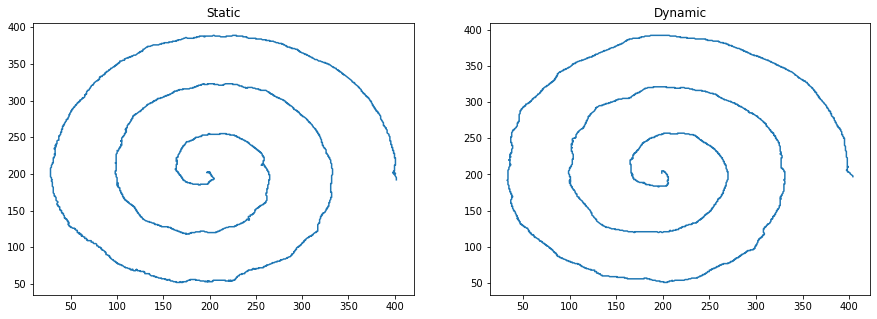

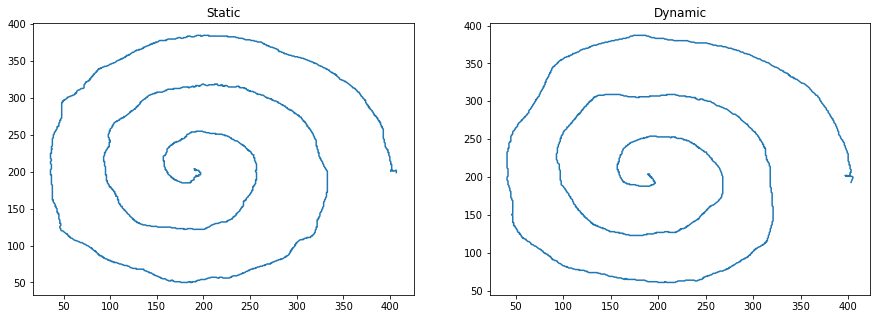

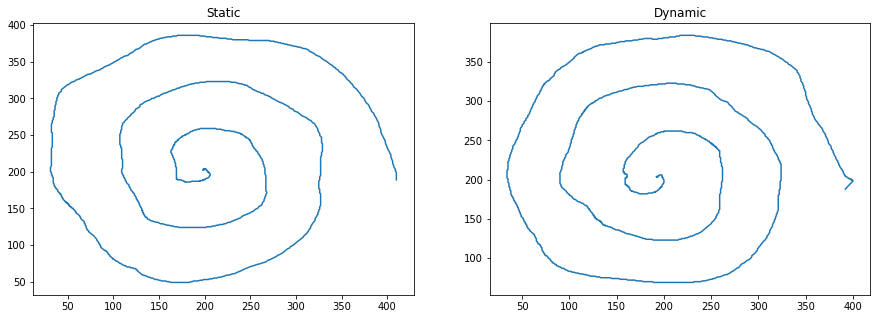

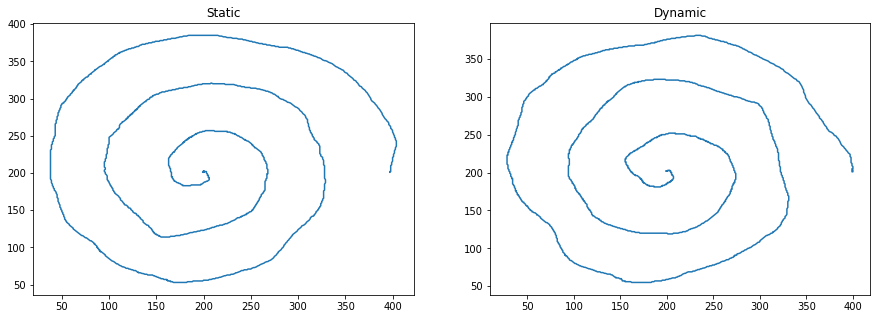

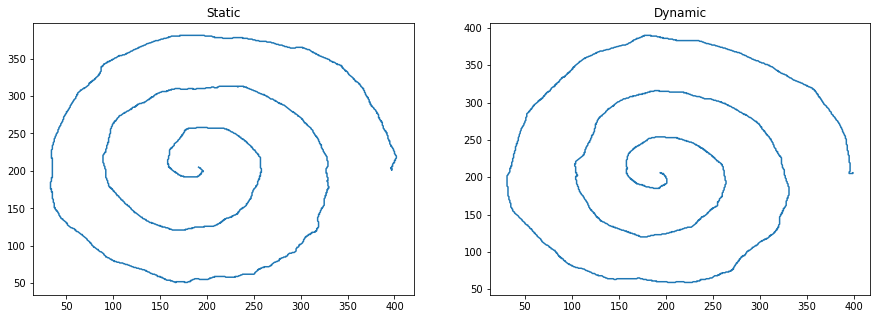

In [ ]:
for i in range(15):
    if i+1 < 10: 
        df = pd.read_csv('/work/ParkinsonHW/C_000' + str(i+1) + '.txt', sep = ';', header = None)
    else: 
        df = pd.read_csv('/work/ParkinsonHW/C_00' + str(i+1) + '.txt', sep = ';', header = None)
    df_static = df[(df[6] == 0)]
    df_dynamic = df[(df[6]==1)]

    plt.figure(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df_static[0], df_static[1])
    plt.title('Static')
    plt.subplot(1, 2, 2)
    plt.plot(df_dynamic[0], df_dynamic[1])
    plt.title('Dynamic')

In [ ]:
def smoothCurve(curve, n, smoothing_factor):
    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[0,:], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[1,:], k=4)

    sx.set_smoothing_factor(smoothing_factor)
    sy.set_smoothing_factor(smoothing_factor)
    
    t = np.linspace(0, curve.shape[1], n)
    new_curve = np.zeros((2, n))
    new_curve[0,:] = sx(t)
    new_curve[1,:] = sy(t)
    
    # new_curve: interpolated/transformed curve
    return new_curve

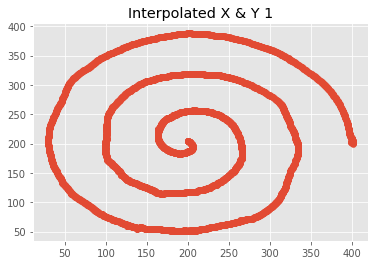

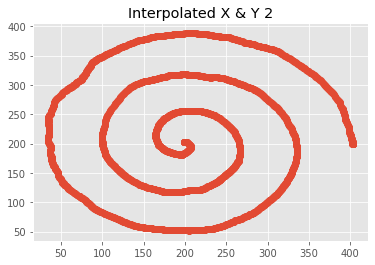

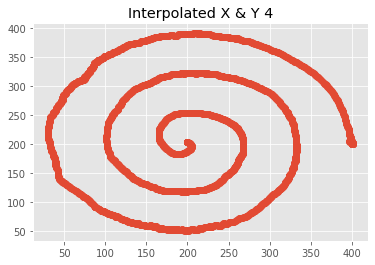

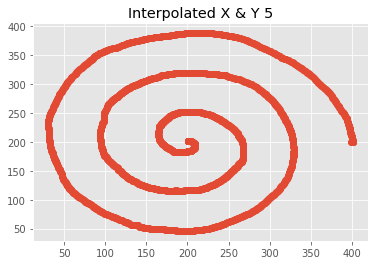

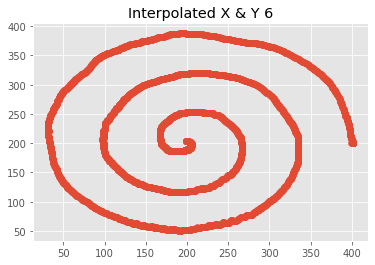

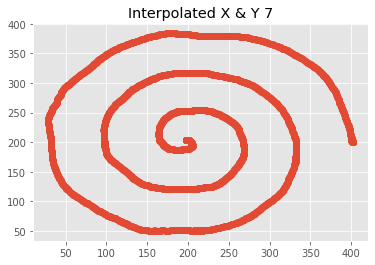

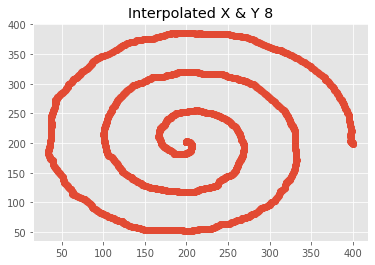

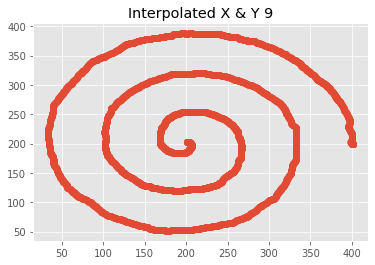

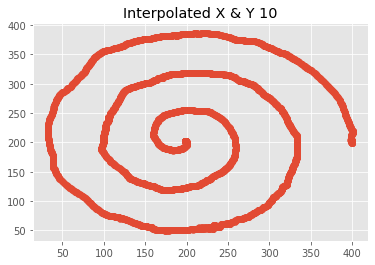

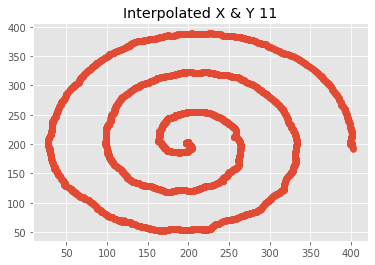

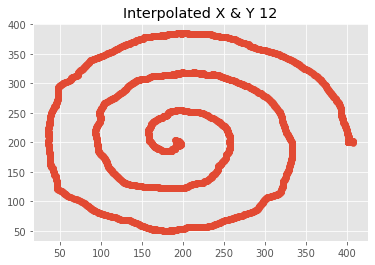

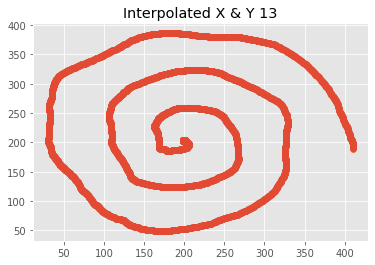

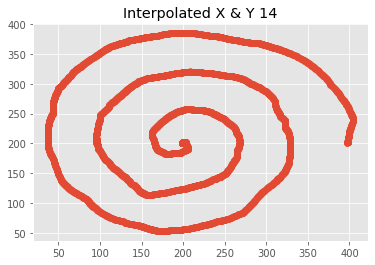

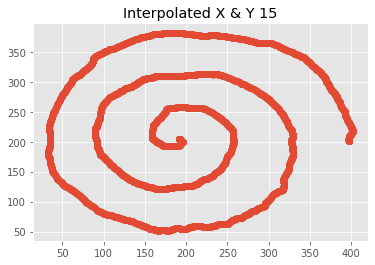

In [ ]:
# static curve registration for FDA
n = 2
T = 5000

# i = 3 is the bad static spiral (off center and larger than others)
lst = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
K = len(lst)
beta = np.zeros((n, T, K))
newXs = []
newYs = []
#for i in range(K): 
for i in lst: 
    if i < 10: 
        df = pd.read_csv('/work/ParkinsonHW/C_000' + str(i) + '.txt', sep = ';', header = None)
    else: 
        df = pd.read_csv('/work/ParkinsonHW/C_00' + str(i) + '.txt', sep = ';', header = None)
    df_static = df[(df[6] == 0)]
    x = df_static[0]
    y = df_static[1]
    t = df_static[5]
    curve = np.array([x, y])
    newXs.append(smoothCurve(curve, T, 5000)[0])
    newYs.append(smoothCurve(curve, T, 5000)[1])

    plt.figure()
    plt.scatter(list(np.interp(np.linspace(np.min(t), np.max(t), T), t, x)), list(np.interp(np.linspace(np.min(t), np.max(t), T), t, y)))
    plt.title('Interpolated X & Y' + ' '+ str(i))

for i in range(K): 
    beta[0, :, i] = newXs[i]
    beta[1, :, i] = newYs[i]

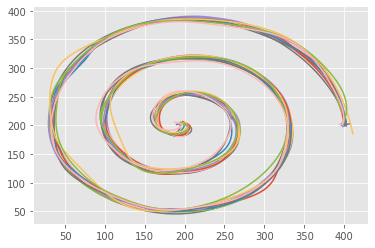

In [ ]:
for i in range(K): 
    plt.plot(beta[0, :, i], beta[1, :, i])

In [ ]:
curve = fdasrsf.curve_stats.fdacurve(beta, 'O')
# align curves (this may take some time!)
curve.srvf_align()

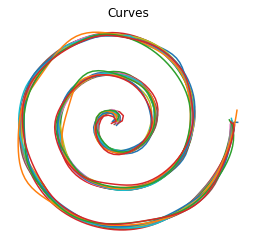

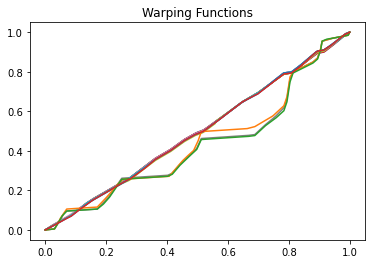

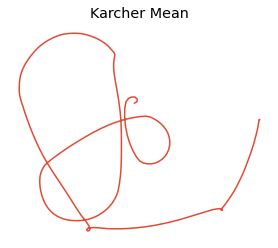

In [ ]:
curve.plot()

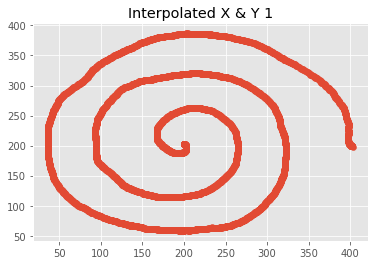

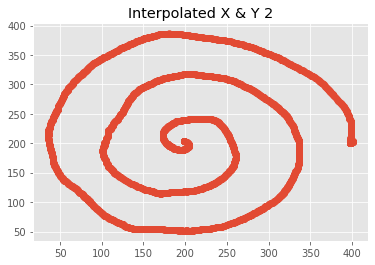

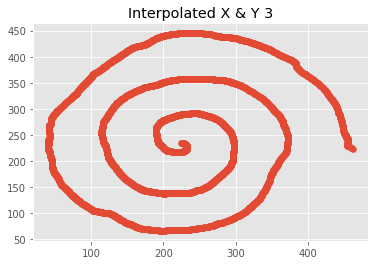

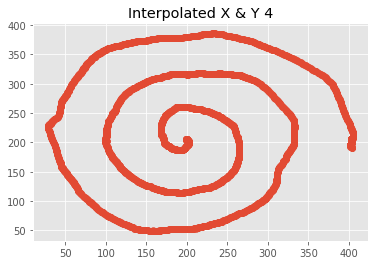

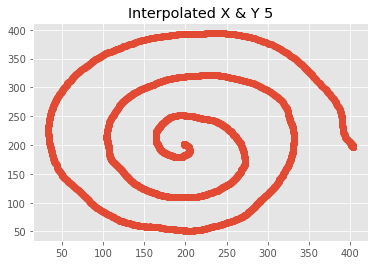

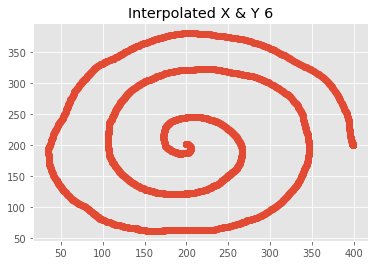

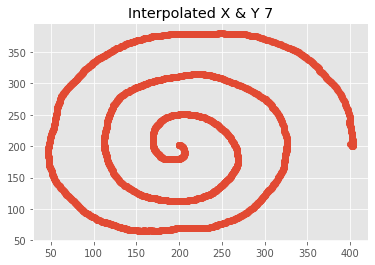

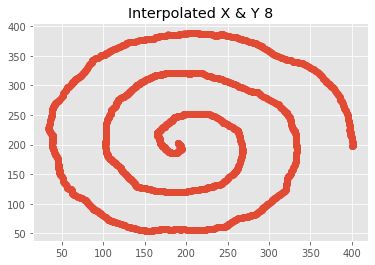

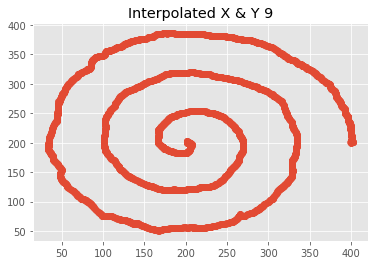

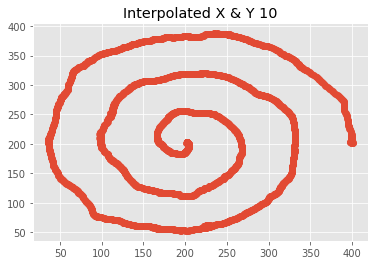

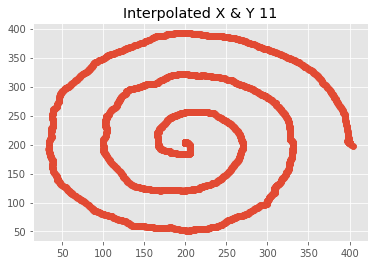

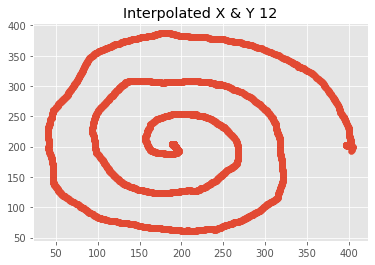

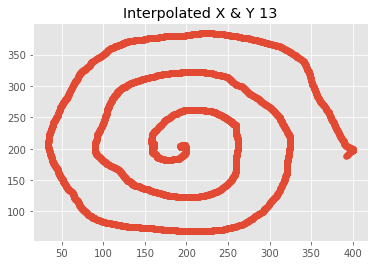

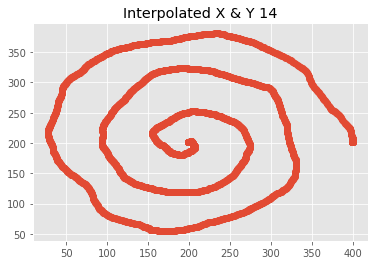

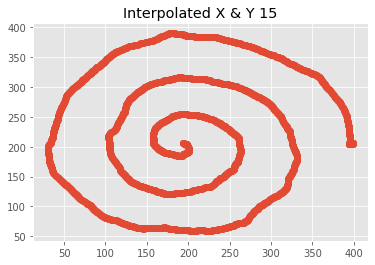

In [ ]:
# dynamic curve registration for FDA (copy above cell for df[6]==1)
# static curve registration for FDA
n = 2
T = 5000

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
K = len(lst)
beta_dynamic = np.zeros((n, T, K))
newXs_d = []
newYs_d = []
#for i in range(K): 
for i in lst: 
    if i < 10: 
        df = pd.read_csv('/work/ParkinsonHW/C_000' + str(i) + '.txt', sep = ';', header = None)
    else: 
        df = pd.read_csv('/work/ParkinsonHW/C_00' + str(i) + '.txt', sep = ';', header = None)
    df_dynamic = df[(df[6] == 1)]
    x = df_dynamic[0]
    y = df_dynamic[1]
    t = df_dynamic[5]
    curve = np.array([x, y])
    newXs_d.append(smoothCurve(curve, T, 5000)[0])
    newYs_d.append(smoothCurve(curve, T, 5000)[1])

    plt.figure()
    plt.scatter(list(np.interp(np.linspace(np.min(t), np.max(t), T), t, x)), list(np.interp(np.linspace(np.min(t), np.max(t), T), t, y)))
    plt.title('Interpolated X & Y' + ' '+ str(i))

for i in range(K): 
    beta_dynamic[0, :, i] = newXs_d[i]
    beta_dynamic[1, :, i] = newYs_d[i]

In [ ]:
for i in range(K): 
    beta_dynamic[0, :, i] = newXs_d[i]
    beta_dynamic[1, :, i] = newYs_d[i]

# create a curve registration object
dynamic_curve = fdasrsf.curve_stats.fdacurve(beta_dynamic, 'O')
# align curves (this make take some time!)
dynamic_curve.srvf_align()

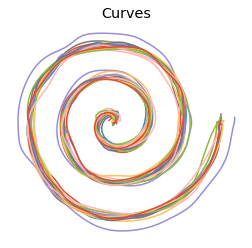

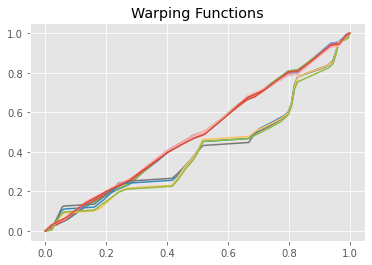

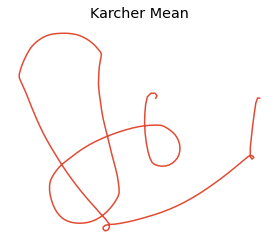

In [ ]:
dynamic_curve.plot()